<a href="https://colab.research.google.com/github/Binomix/binomix.github.io/blob/master/Binomix_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(r'/content/kn8551.csv',encoding ='ISO-8859-1',sep=';')

In [ ]:
df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT
0,chr1,752721,rs3131972,A,G,.,.,.,GT
1,chr1,759036,rs114525117,G,A,.,.,.,GT
2,chr1,801536,rs79373928,T,G,.,.,.,GT
3,chr1,834830,rs116452738,G,A,.,.,.,GT
4,chr1,835092,rs72631887,T,G,.,.,.,GT
...,...,...,...,...,...,...,...,...,...
992,chr1,4566515,rs4654441,A,G,.,.,.,GT
993,chr1,4568131,rs150200468,G,A,.,.,.,GT
994,chr1,4569834,rs780568,A,G,.,.,.,GT
995,chr1,4574090,rs79383560,A,G,.,.,.,GT


In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
POS,997.0,2.776188e+06,1.100232e+06,752721.0,1933267.0,2902128.0,3651031.0,4574117.0


In [ ]:
corr = df.corr()

In [ ]:
# Get the absolute value of the correlation
cor_target = abs(corr["POS"])

# Select highly correlated features (thresold = 0.2)
relevant_features = cor_target[cor_target>0.2]

# Collect the names of the features
names = [index for index, value in relevant_features.iteritems()]

# Drop the target variable from the results
names.remove('POS')

# Display the results
print(names)

[]


In [ ]:
X = df['REF'].values
y = df['POS']

In [ ]:
input_data=pd.get_dummies(df['REF'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) #split the  data into traing and validating

In [ ]:
import seaborn

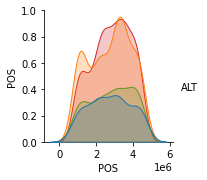

In [ ]:
seaborn.pairplot(df, hue='ALT' )

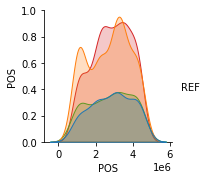

In [ ]:
seaborn.pairplot(df, hue='REF' )

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import train_test_split

In [ ]:
X = df.iloc[:,:-1].values

In [ ]:
y = df['POS']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)

In [ ]:
print(X_train)
print(y_train)

[['chr1' 1404796 'rs182336567' ... '.' '.' '.']
 ['chr1' 4370385 'rs351615' ... '.' '.' '.']
 ['chr1' 3679783 'rs76416341' ... '.' '.' '.']
 ...
 ['chr1' 4104757 'rs12036953' ... '.' '.' '.']
 ['chr1' 3485108 'rs75995598' ... '.' '.' '.']
 ['chr1' 888659 'rs3748597' ... '.' '.' '.']]
172    1404796
936    4370385
753    3679783
403    2449924
286    2071700
        ...   
824    4037665
543    3058238
840    4104757
696    3485108
19      888659
Name: POS, Length: 797, dtype: int64


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from tqdm.notebook import tqdm
import itertools


from sklearn import preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedShuffleSplit, cross_val_predict
from sklearn import svm
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from scipy.spatial.distance import pdist, squareform

plt.style.use('default')

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Helvetica Neue']

import warnings
warnings.filterwarnings('ignore') 

In [ ]:
def reset_plot_style():
    plt.style.use('default')
    mpl.rcParams['figure.dpi']= 300
    mpl.rcParams['font.family'] = 'sans-serif'
    mpl.rcParams['font.sans-serif'] = ['Helvetica Neue']

In [ ]:
df.loc[df['CHROM'].str.contains("foo") == True]=1
df.loc[df['REF'].str.contains("foo") == True]=0

In [ ]:
input_data = df[['CHROM', 'POS', 'ID', 'REF']]
output_data = (df['ALT'])

In [ ]:
len(input_data)

997

In [ ]:
(input_data.isnull()).values.ravel().sum()

0

In [ ]:
(~input_data.isnull()).values.ravel().sum()

3988

In [ ]:
input_data.isnull().values.sum(axis = 0)

array([0, 0, 0, 0])

In [ ]:
input_data = np.array(input_data)
output_data = np.array(output_data)

In [ ]:
input_data=pd.get_dummies(df['CHROM'])

In [ ]:
input_data=pd.get_dummies(df['ID'])

In [ ]:
iter_imp = IterativeImputer(add_indicator = True, max_iter = 100)
iter_imp.fit(input_data)
imp_input_data = iter_imp.transform(input_data)

In [ ]:
scaler = preprocessing.StandardScaler().fit(imp_input_data)
imp_scaled_input_data = scaler.transform(imp_input_data)

In [ ]:
pca = PCA(n_components = 2)
pca.fit(imp_scaled_input_data)
pca_input = pca.transform(imp_scaled_input_data)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(imp_scaled_input_data)
pca_input = pca.transform(imp_scaled_input_data)

print("explained variance per feature", end = "")
print(pca.explained_variance_ratio_)
print(f"2 compomemt - explained variance {np.sum(pca.explained_variance_ratio_):.3f}")

explained variance per feature[0.00100402 0.00100402]
2 compomemt - explained variance 0.002


In [ ]:
import matplotlib.pyplot as plt

plt.scatter( X[:, 0], X[:, 1] )

NameError: ignored

In [ ]:
exp = np.repeat(np.arange(-5, 0, 1, dtype = float), 4)
mul = np.tile(np.arange(1,10, 2), 4)
gamma = list(mul*(10**exp))
C = list(mul[::-1]*(10**(-exp-1)))

X_train, X_test, y_train, y_test = train_test_split(imp_scaled_input_data, 
                                                    output_data,
                                                    test_size = 0.4, 
                                                    shuffle = True, 
                                                    )

tuned_parameters = {'C': C, 
                    'gamma': gamma, 
                    'kernel': ['rbf'], 
                    'class_weight':['balanced']}

optim_clf = GridSearchCV(
    svm.SVC(), tuned_parameters, cv = 5, scoring = 'precision', verbose = 0
)

optim_clf.fit(X_train, y_train)
print(optim_clf.best_params_)

y_true, y_pred = y_test, optim_clf.predict(X_test)
print(classification_report(y_true, y_pred))

{'C': 90000.0, 'class_weight': 'balanced', 'gamma': 1e-05, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           A       0.00      0.00      0.00       149
           C       0.00      0.00      0.00        73
           G       0.00      0.00      0.00        52
           T       0.31      1.00      0.48       125

    accuracy                           0.31       399
   macro avg       0.08      0.25      0.12       399
weighted avg       0.10      0.31      0.15       399



In [ ]:
plot_confusion_matrix(optim_clf, X_test, y_test, display_labels = ['ATL', 'REF'])

NameError: ignored

In [ ]:
def find_best_hyperparams(inputs, outputs, n_splits, param_dict, test_size = 0.3):
    
    strat_shuffle_split = StratifiedShuffleSplit(n_splits = n_splits, test_size = test_size)
    
    pipe = Pipeline([
        ('imputer', IterativeImputer(add_indicator = True, max_iter = 100)),
        ('scaler', preprocessing.StandardScaler()),
        ('hyperparam_gridsearch', GridSearchCV(
            
            estimator = svm.SVC(), 
            param_grid = param_dict, 
            cv = strat_shuffle_split, 
            scoring = 'balanced_accuracy', 
            verbose = 0, 
            n_jobs = -1
        ))
    ])
    
    pipe.fit(inputs, outputs)
    model = pipe['hyperparam_gridsearch']
    hyperparam_idx = model.cv_results_['params'].index(model.best_params_)
    best_hyperparam_scores = np.array([model.cv_results_[f'split{i}_test_score'][hyperparam_idx] for i in range(n_splits)])
    
    return model.best_params_, best_hyperparam_scores

def shuffle_split_validation(inputs, outputs, n_splits, **svc_params):
    
    strat_shuffle_split = StratifiedShuffleSplit(n_splits = n_splits, test_size = 0.3)
    
    pipe = Pipeline([
        ('imputer', IterativeImputer(add_indicator = True, max_iter = 100)),
        ('scaler', preprocessing.StandardScaler())    
    ])
    
    pipe.fit(inputs, outputs)
    data = pipe.transform(inputs)
    
    holder_predictions = []
    holder_probabilities = []
    holder_scores = []
    holder_true_labels = []
    
    model = svm.SVC(probability = True, **svc_params)
    
    for train_idx, test_idx in tqdm(strat_shuffle_split.split(data, outputs), total = n_splits):
        X_train, X_test, y_train, y_test = (data[train_idx], 
                                            data[test_idx], 
                                            outputs[train_idx], 
                                            outputs[test_idx])
        model.fit(X_train, y_train)
        
        predictions = model.predict(X_test)
        probabilities = model.predict_proba(X_test)
        scores = model.score(X_test, y_test)
        
        holder_predictions.append(predictions)
        holder_probabilities.append(probabilities)
        holder_scores.append(scores)
        holder_true_labels.append(y_test)
        
    return holder_predictions, holder_probabilities, holder_scores, holder_true_labels

def two_threshold_acc(t0, t1, probs, preds, trues, min_cov, rich_output = False):
    if t1<t0:
        return 0.0
    bool_array = np.logical_or(np.logical_and(probs < t0, preds==0), np.logical_and(probs > t1, preds==1))
    new_preds = preds[bool_array]
    if (len(new_preds)/len(trues)) <= min_cov:
        return -1.0
    new_trues = trues[bool_array]
    n_corr = ((new_preds * new_trues) + (1 - new_preds) * (1 - new_trues)).sum()
    if not rich_output:
        return n_corr/len(new_trues)
    else:
        new_probs = probs[bool_array]
        return n_corr/len(new_trues), new_probs, new_trues, new_preds


def get_coverage_threshold(probs, preds, trues, min_cov):
    probs_sort = probs.copy()
    probs_sort.sort()
    probs_sort_roll = np.roll(probs_sort, -1)
    probs_sort_roll[-1] = 1
    possible_thresholds = (probs_sort_roll + probs_sort)/2
    indices = np.vstack(np.triu_indices(len(possible_thresholds))).T
    
    threshold_pairs = possible_thresholds[indices]
    accs = np.apply_along_axis(lambda x: two_threshold_acc(x[0], x[1], probs, preds, trues, min_cov), 1, threshold_pairs)
    max_acc_idx = np.argmax(accs)
    max_acc_thresholds = threshold_pairs[max_acc_idx]
    
    _, new_probs, new_trues, new_preds = two_threshold_acc(max_acc_thresholds[0], 
                                                max_acc_thresholds[1], 
                                                probs, preds, trues, min_cov, 
                                                rich_output = True)
    
    return accs.max(), max_acc_thresholds, new_probs, new_trues, new_preds

def score_with_rejection(holder_preds, holder_probs, holder_trues, min_coverage):
    holder_scores_with_rejection = []
    holder_new_probs = []
    holder_new_trues = []
    holder_new_preds = []
    
    for i in tqdm(range(len(holder_preds))):
        max_acc, max_acc_thresholds, new_probs, new_trues, new_preds = get_coverage_threshold(holder_probs[i][:, 1], 
                                                                                   holder_preds[i], 
                                                                                   holder_trues[i], 
                                                                                   min_coverage)
        holder_scores_with_rejection.append(max_acc)
        holder_new_probs.append(new_probs)
        holder_new_trues.append(new_trues)
        holder_new_preds.append(new_preds)
        
    return holder_scores_with_rejection, holder_new_probs, holder_new_trues, holder_new_preds

def mean_CI(data, a=0.05, N = 1000):

    n = len(data)
    xbar = np.mean(data)
    bootstrap = np.random.choice(a = data, replace = True, size = (N, n))
    bootstrap_means = bootstrap.mean(axis = 1)
    bootstrap_means.sort()
    L = bootstrap_means[int(N * a/2)]
    U = bootstrap_means[int(N * (1 - a/2))]
    return L, xbar, U

    n = len(data)
    sigbar = np.std(data)
    bootstrap = np.random.choice(a = data, replace = True, size = (N, n))
    bootstrap_means = bootstrap.std(axis = 1)
    bootstrap_means.sort()
    L = bootstrap_means[int(N * a/2)]
    U = bootstrap_means[int(N * (1 - a/2))]
    return L, sigbar, U

In [ ]:
toy = np.arange(1,20, 1)

In [ ]:
np.random.choice(a = toy, replace = True, size = (1000, 30))

array([[ 2,  2,  4, ..., 15, 18,  5],
       [15, 19, 13, ...,  5, 11,  5],
       [19, 11, 17, ...,  4, 17,  7],
       ...,
       [11, 12,  7, ...,  4, 19,  7],
       [16, 19, 13, ..., 14, 17, 10],
       [12, 13, 19, ..., 13,  1,  5]])

In [ ]:

tuned_parameters = [{'C': [1,10,25,30,50,75,100,200], 
                        'gamma': [0.001, 0.01, 0.1, 1, 2, 3, 4, 5, 10, 50, 'scale'], 
                        'kernel': ['rbf'], 'class_weight':['balanced']}, 
                        {'kernel': ['poly'], 'degree': [1,2,3,4,5,6], 'class_weight':['balanced']}]

feature_combinations=[[0,1,2,3], [1,2,3], [0,2,3], [0,1,3], [0,1,2]]
combination_names = ['all_features', 'no_pphen2', 'no_coils', 'no_structscore', 'no_mrbayes']
feat_comb_params_dict = {}

for i in tqdm(range(len(feature_combinations))):
    best_params, scores = find_best_hyperparams(inputs = input_data[:, feature_combinations[i]], 
                                              outputs = output_data, 
                                              n_splits = 300, 
                                              param_dict = tuned_parameters, 
                                              test_size = 0.3)
    
    feat_comb_params_dict[combination_names[i]] = (best_params, scores)

AttributeError: ignored